410 nodes
11 layers
fusion: 1772
begin to validate!
validate success!


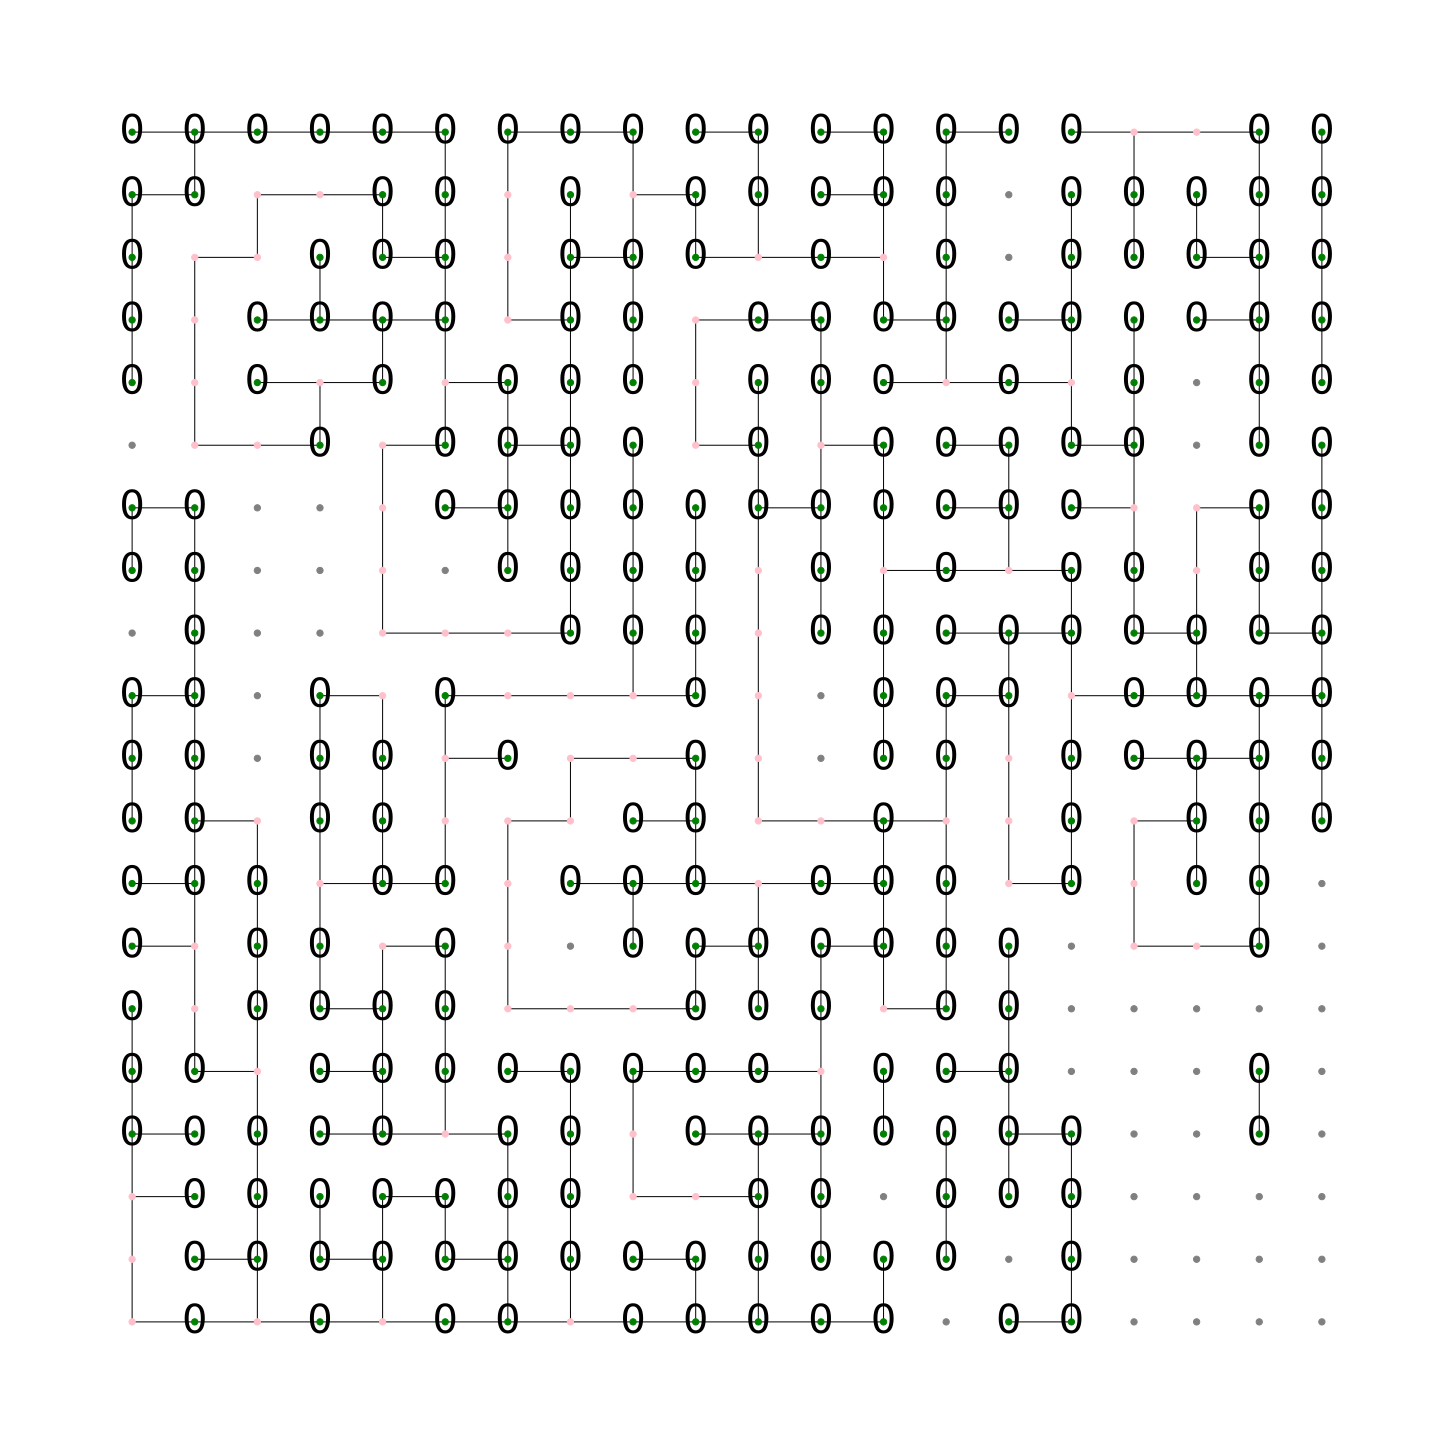

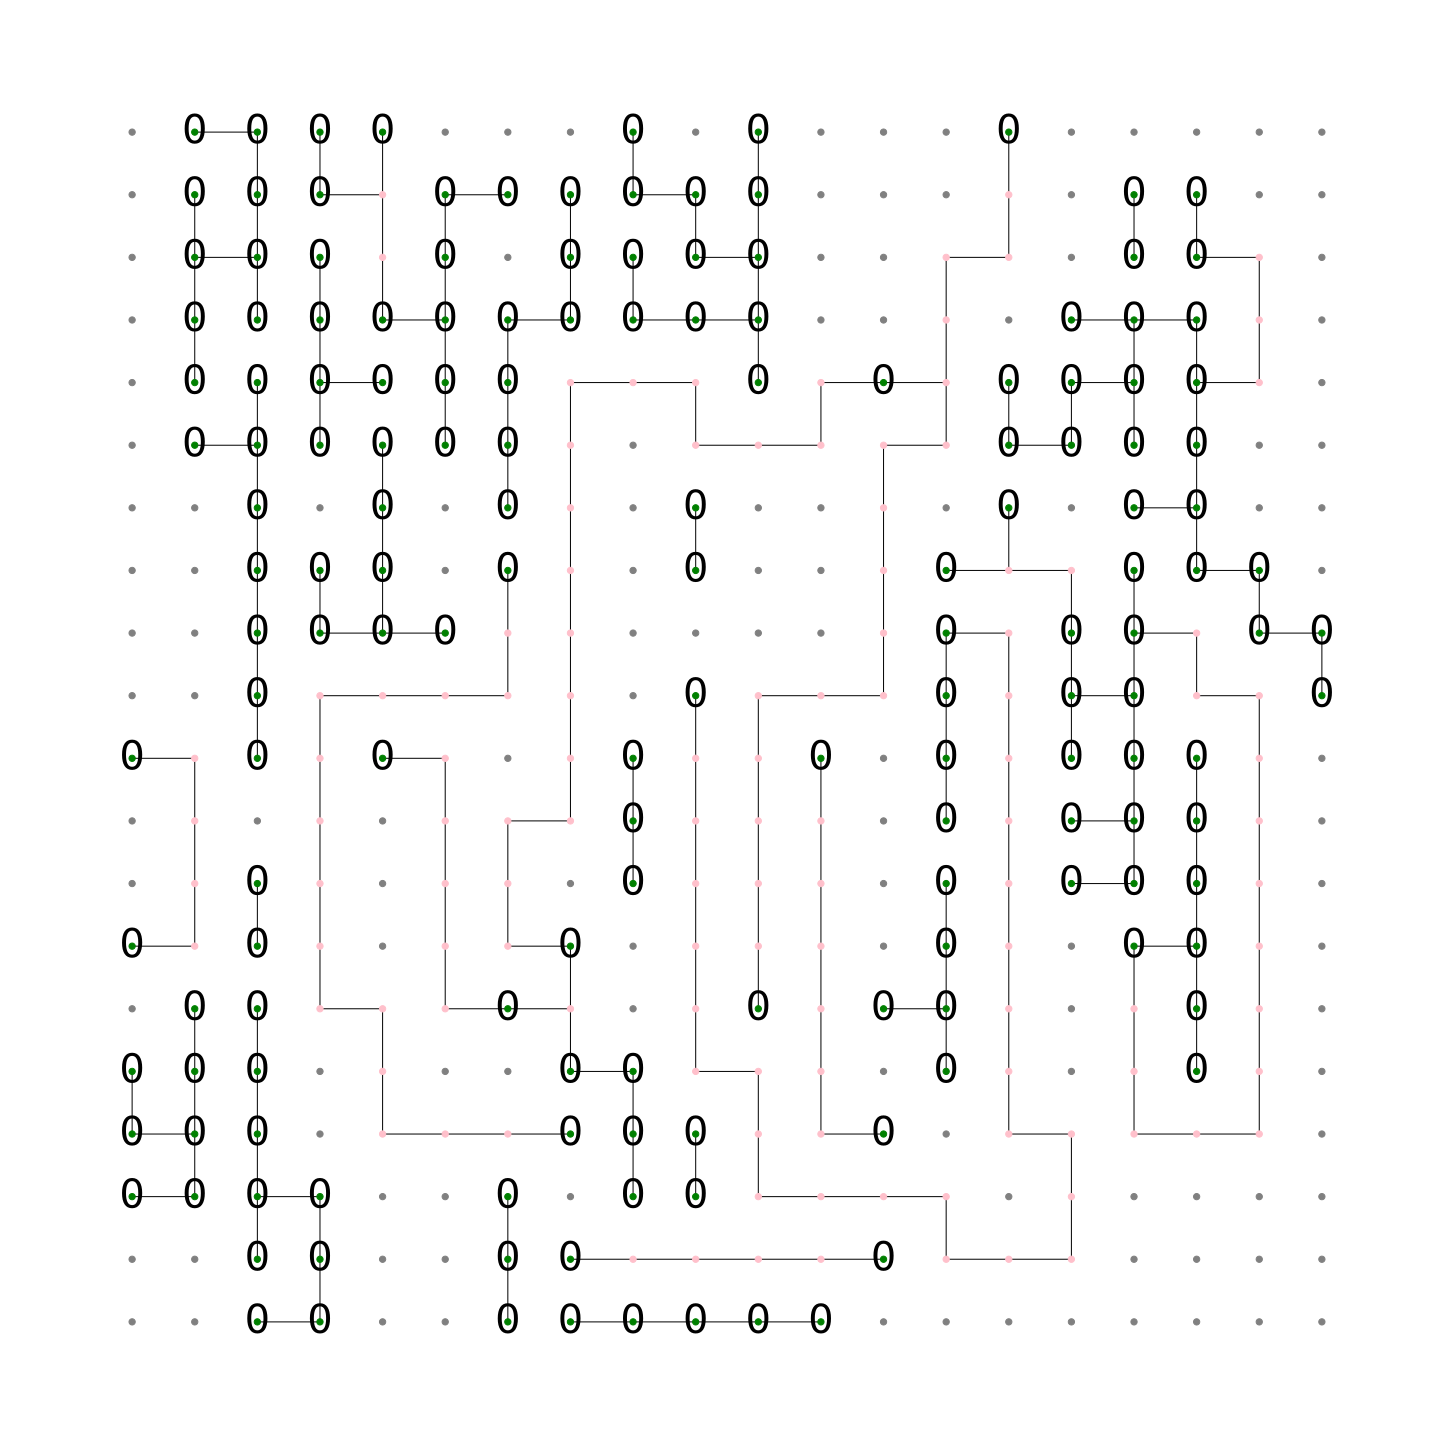

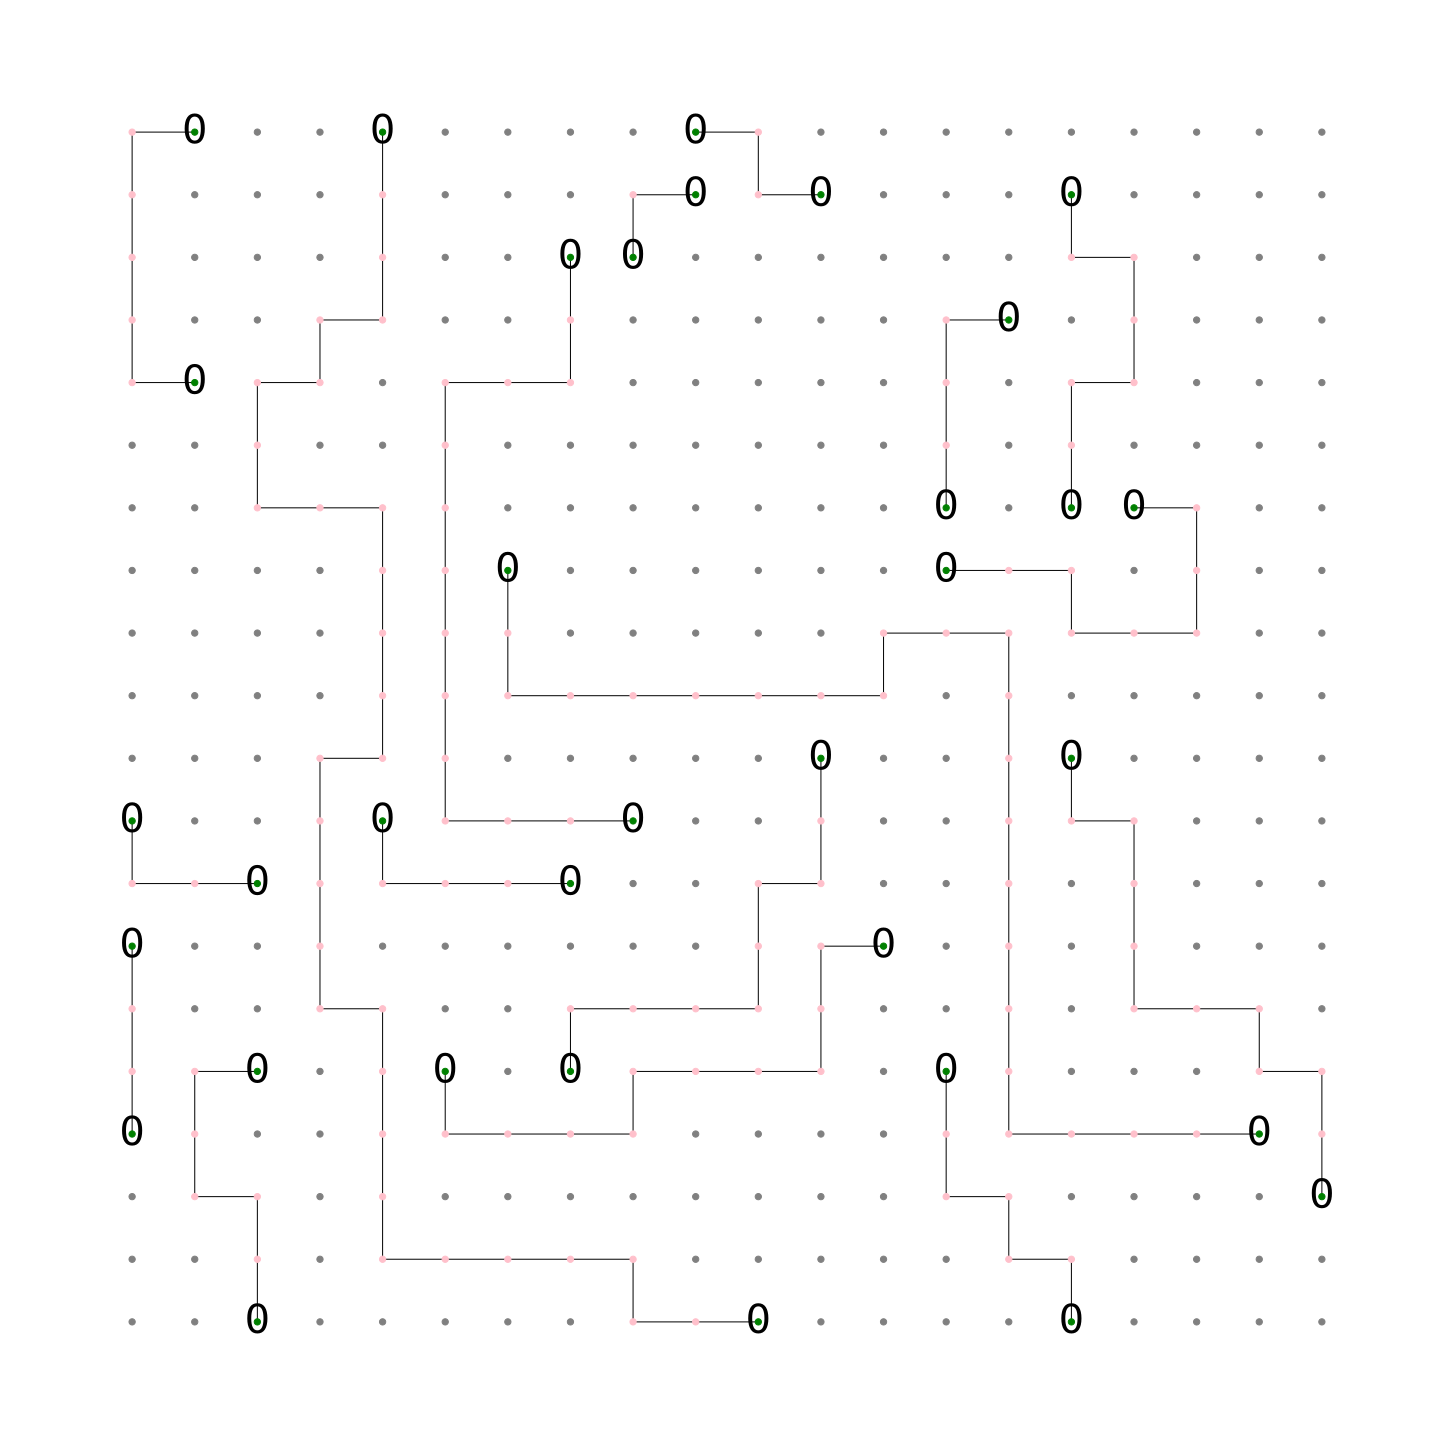

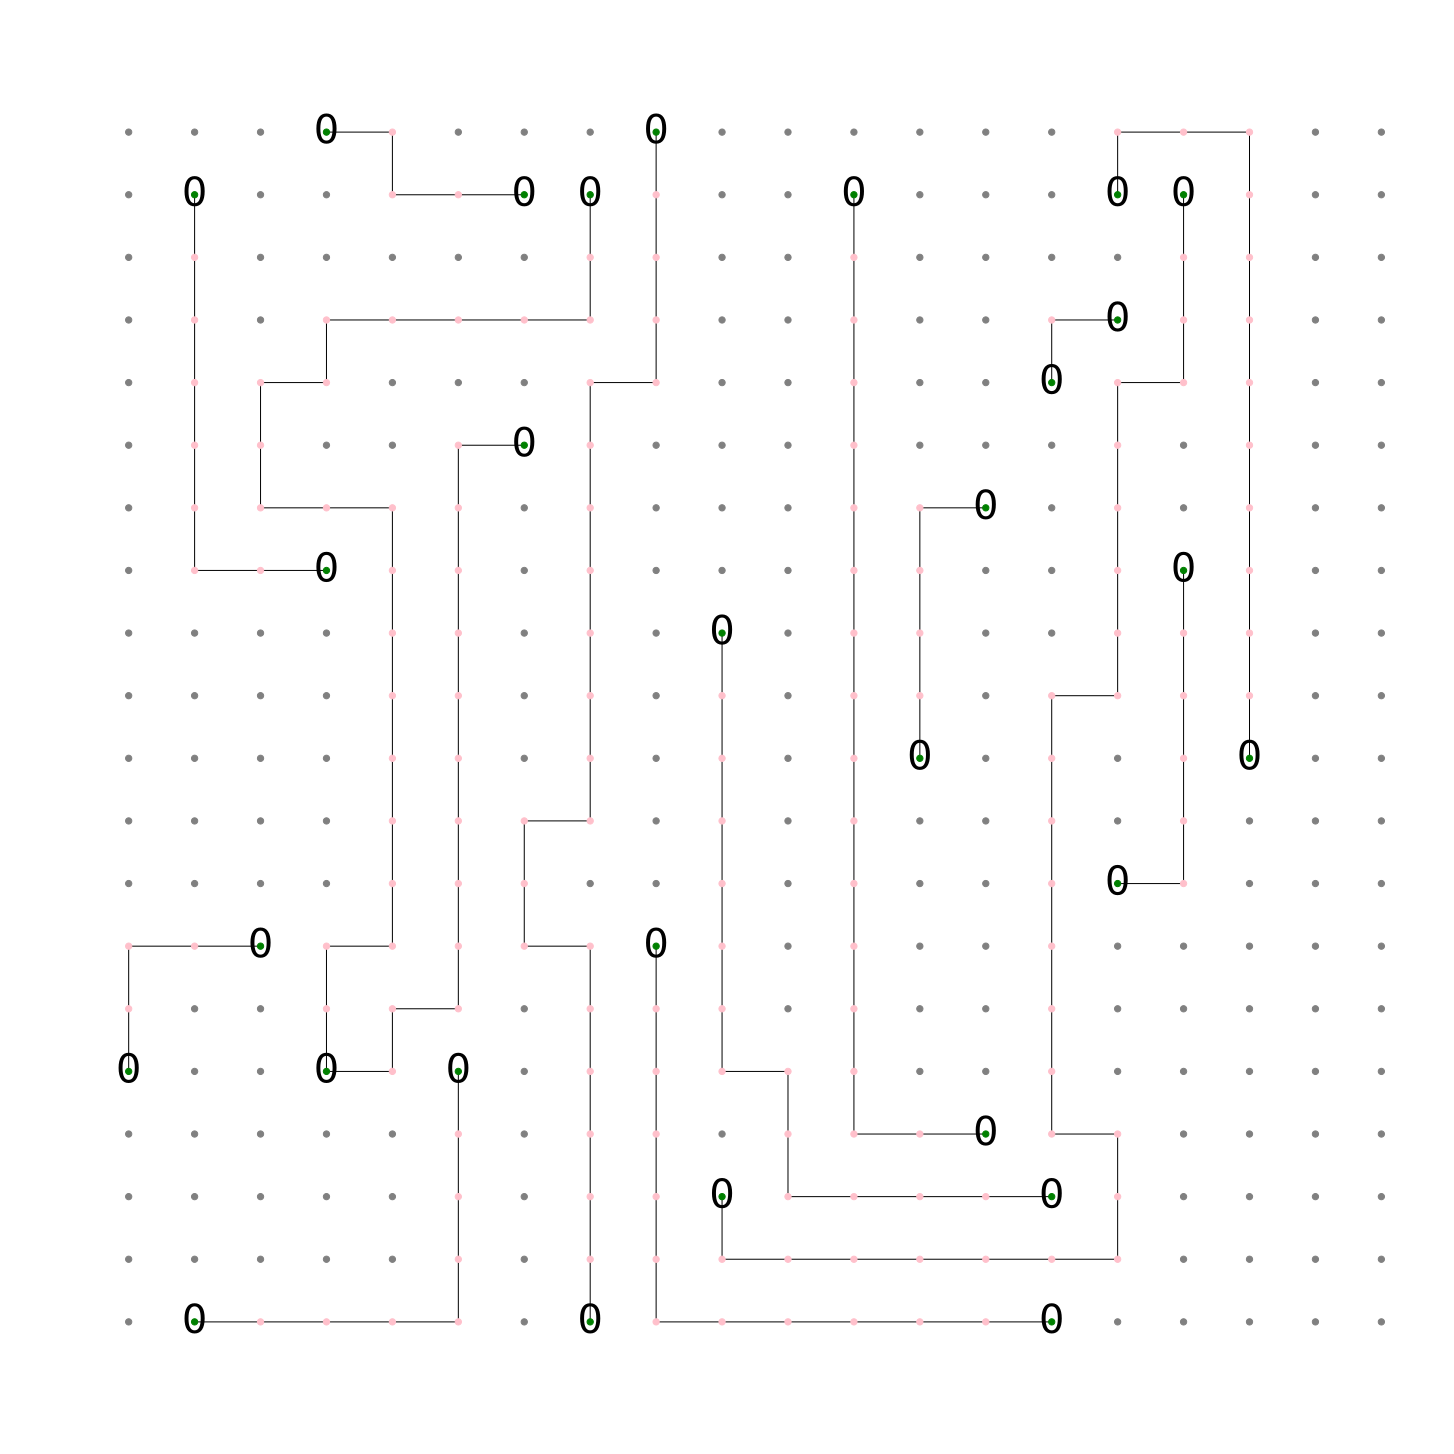

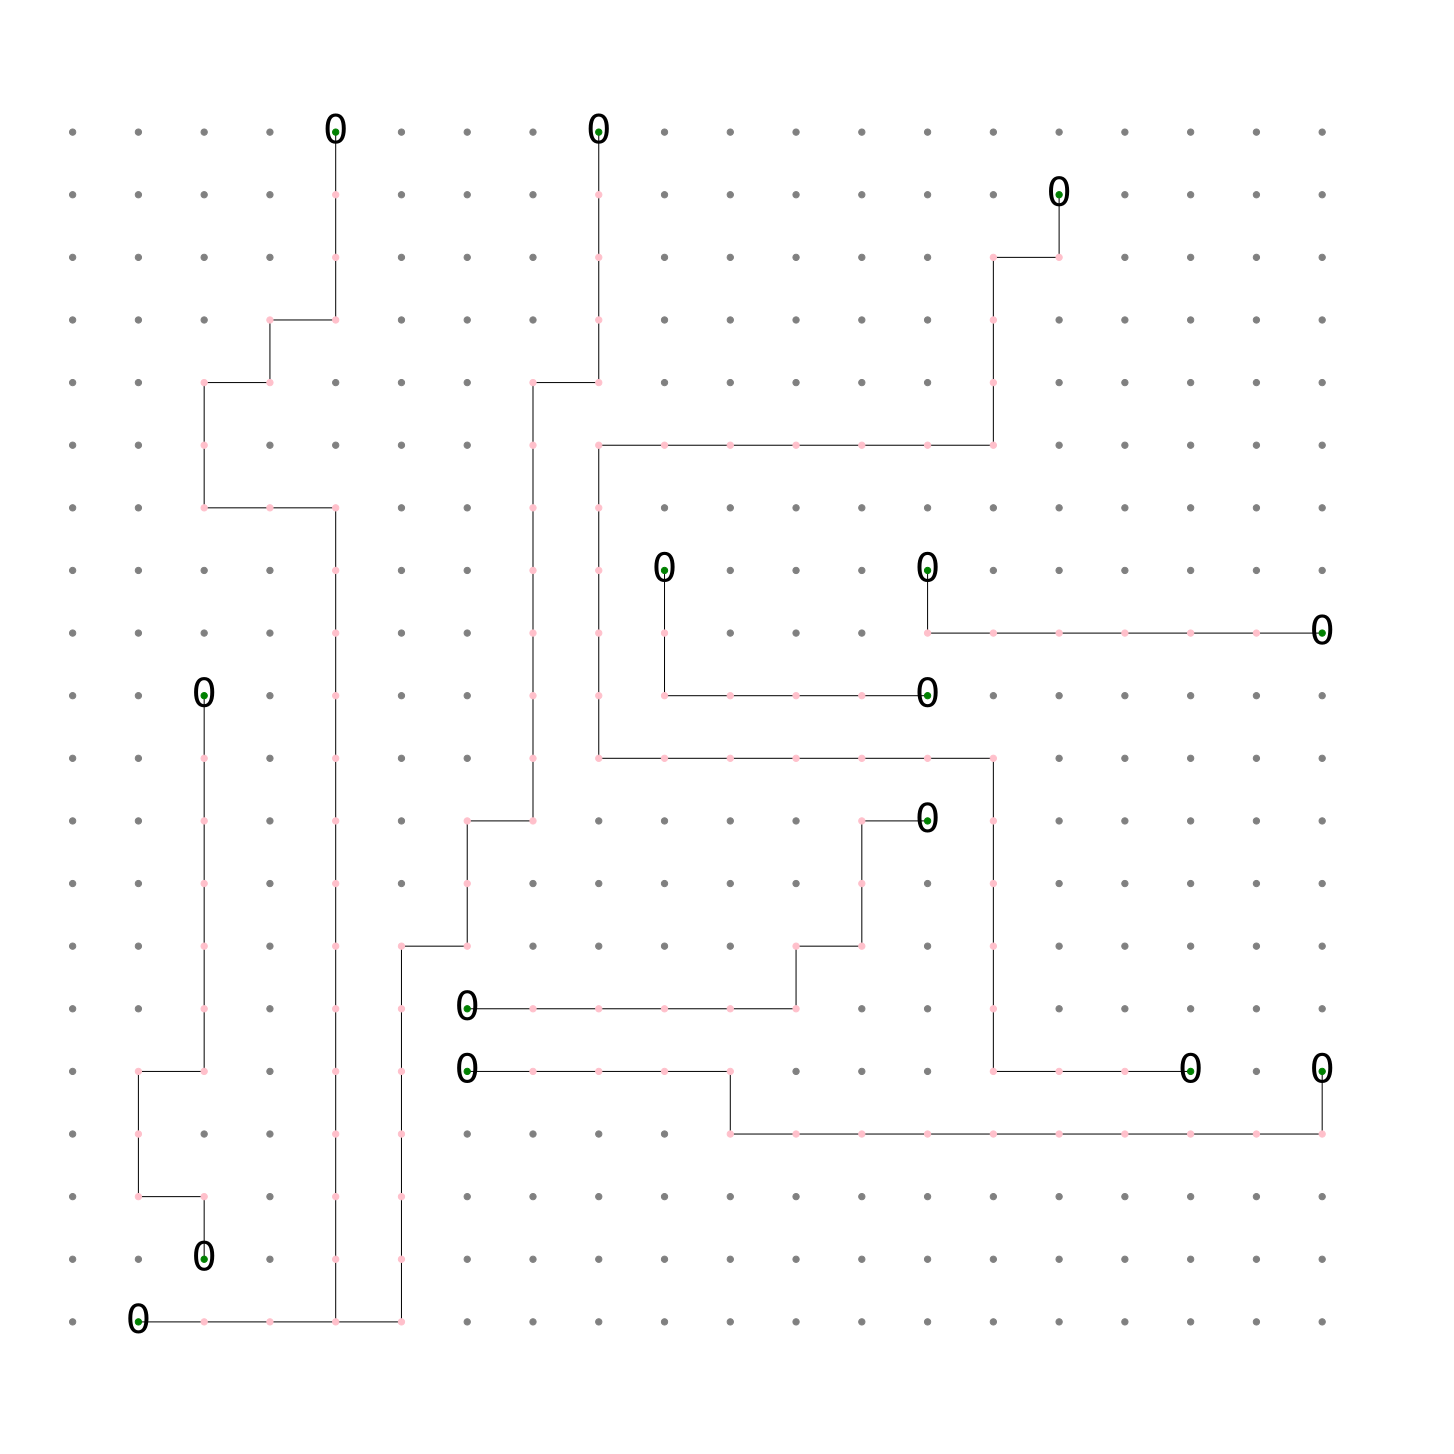

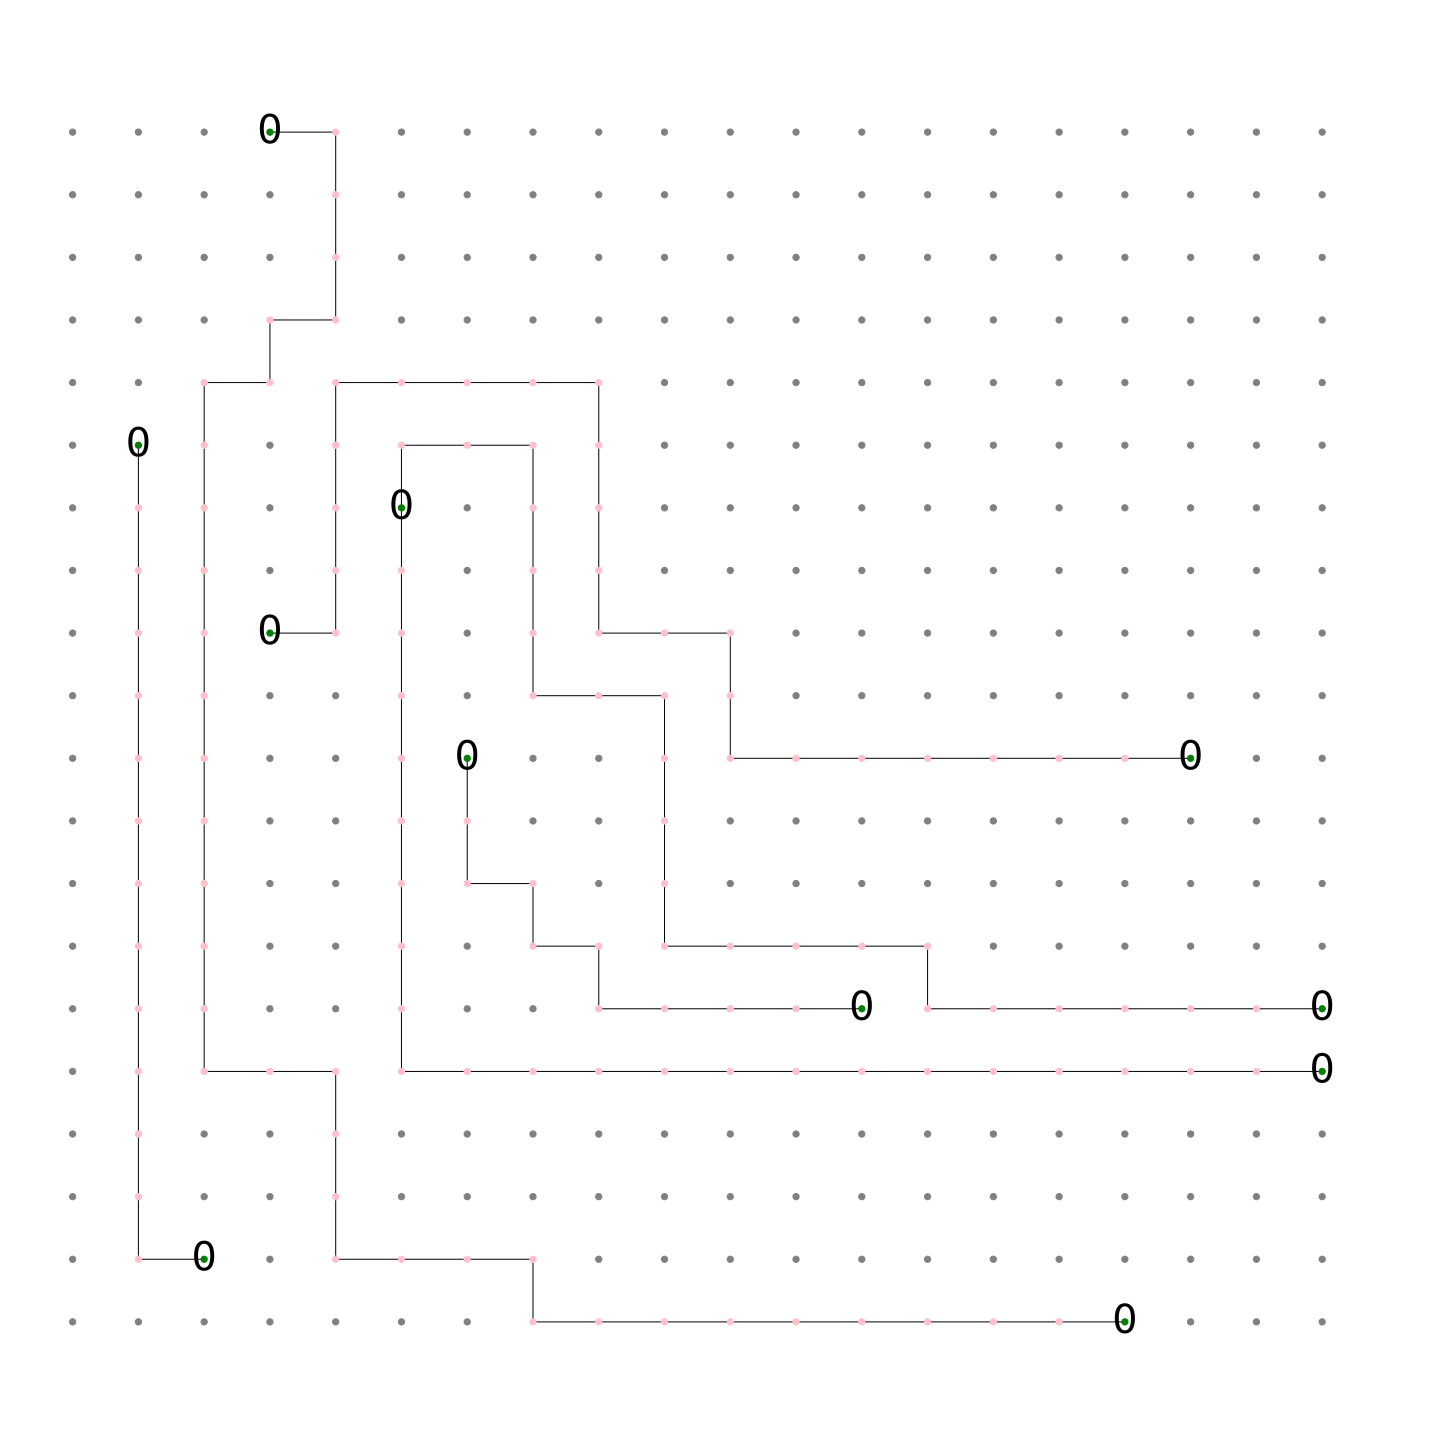

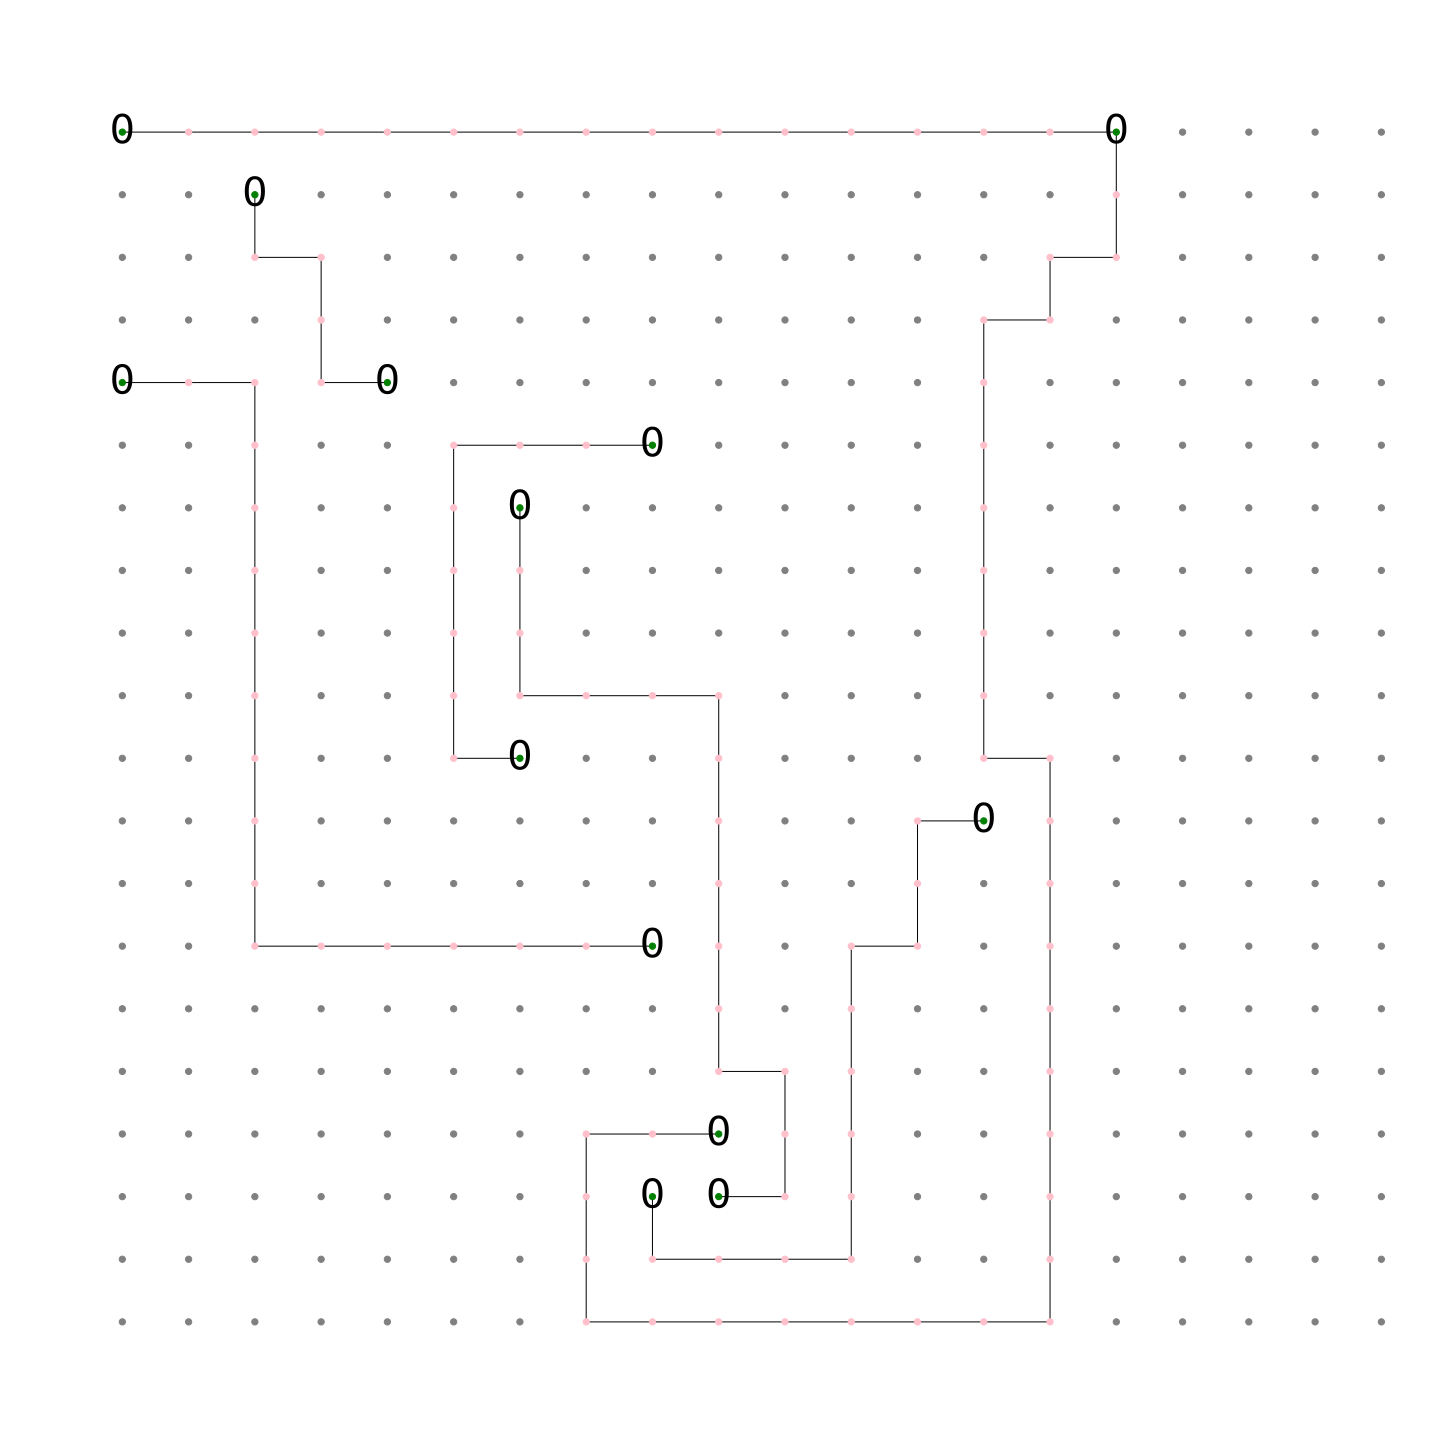

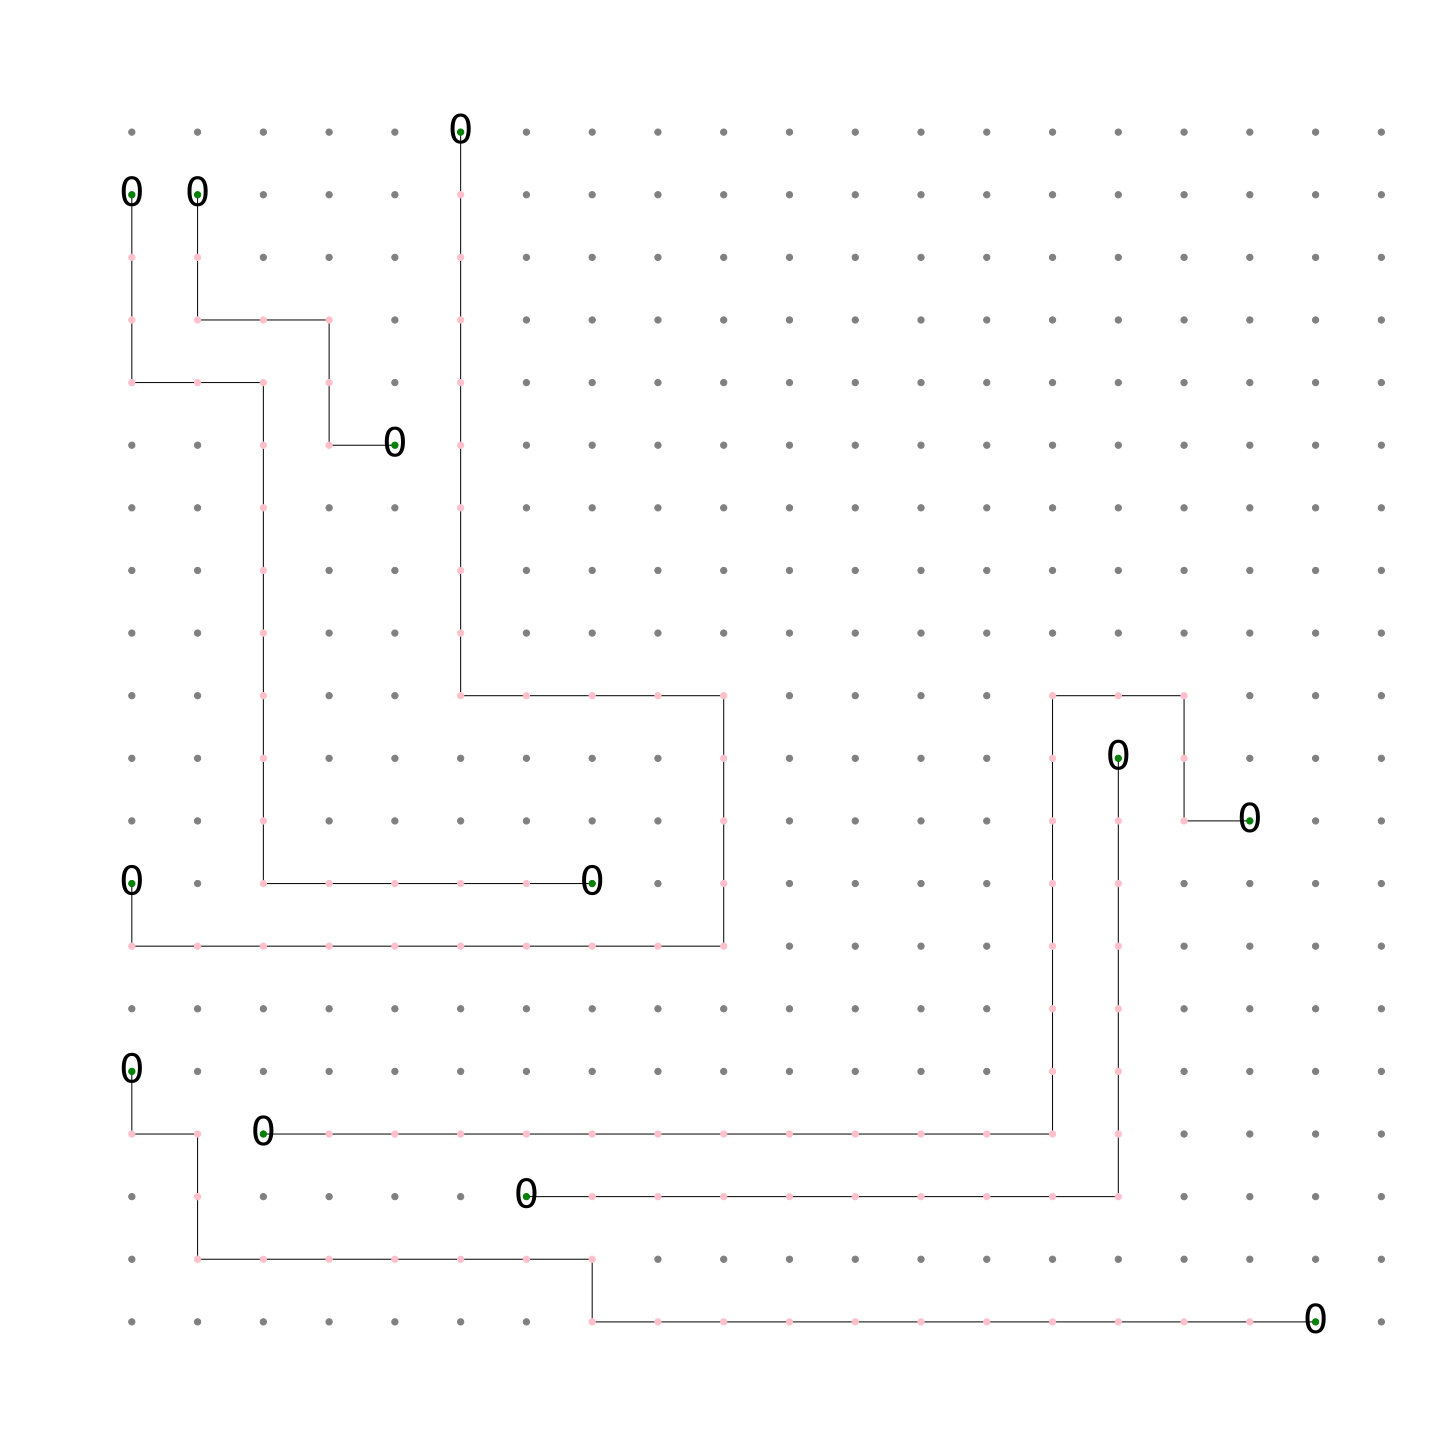

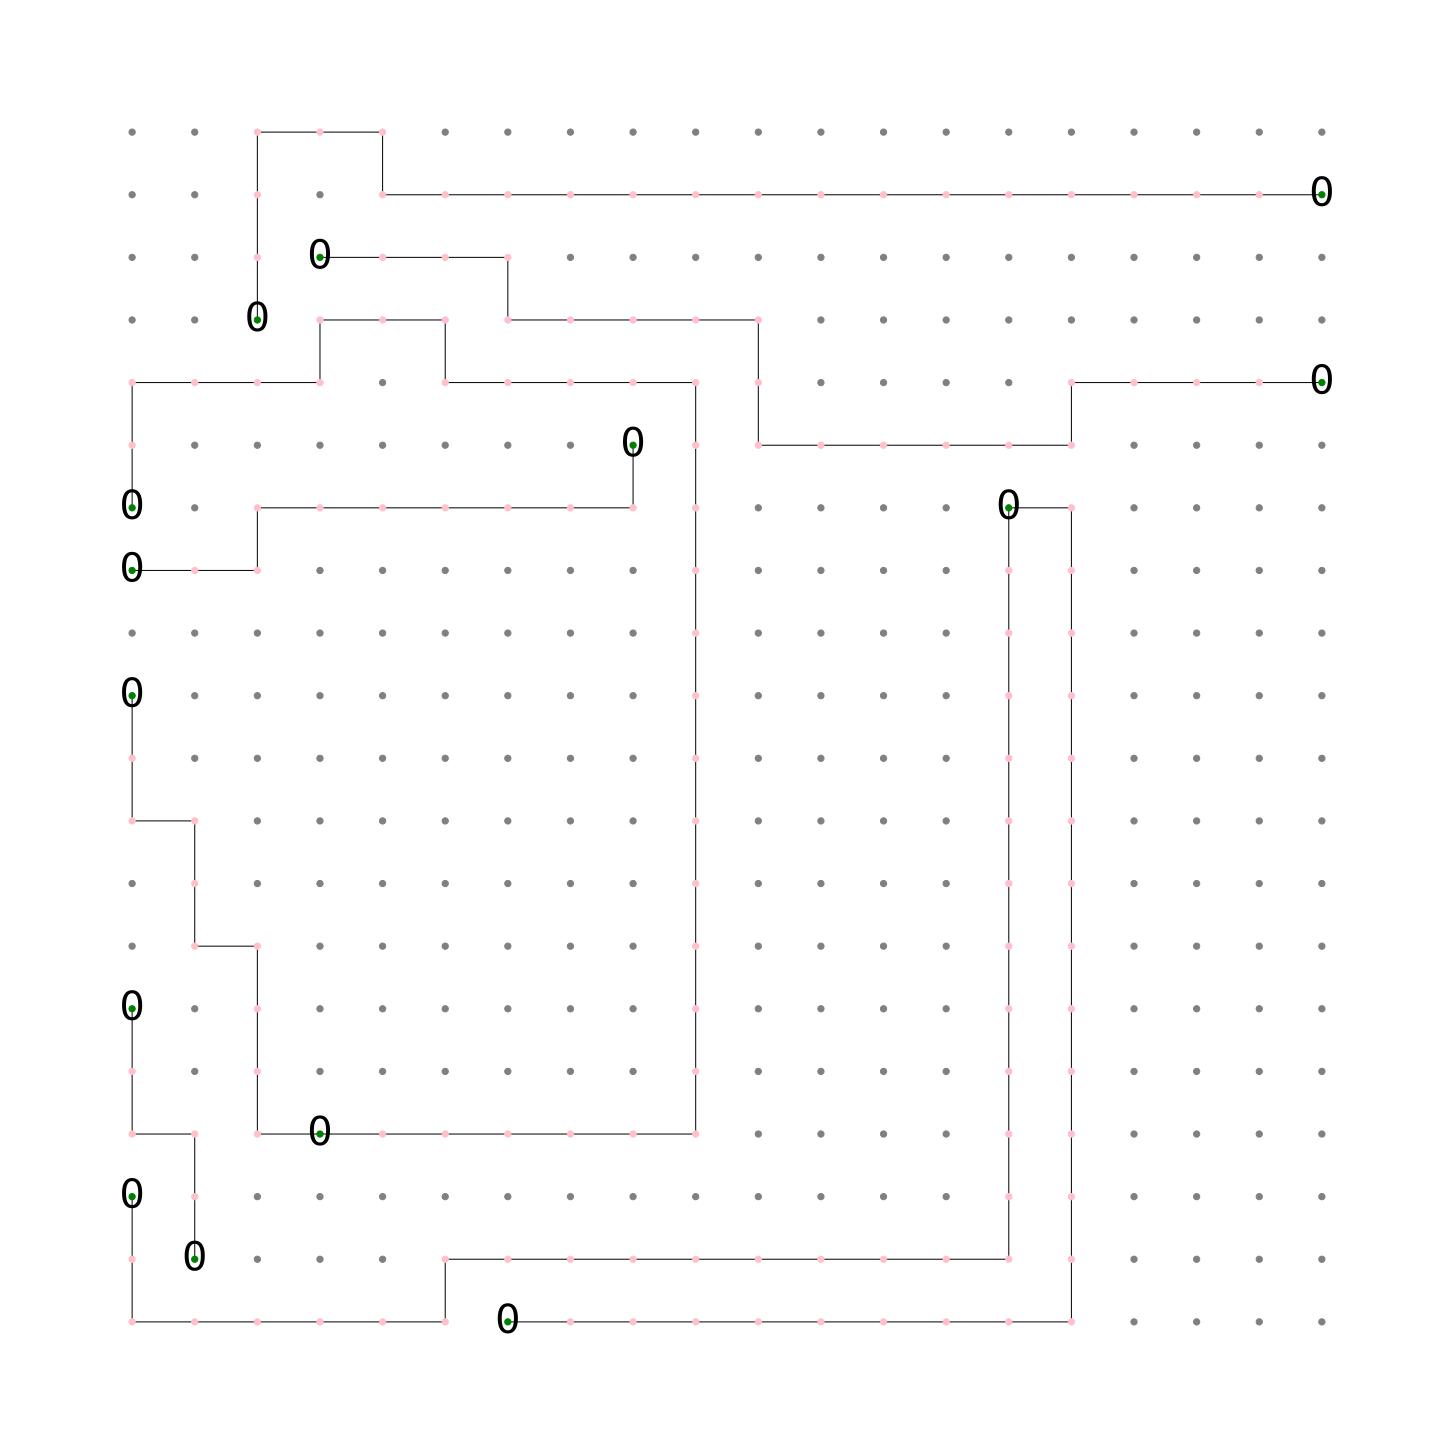

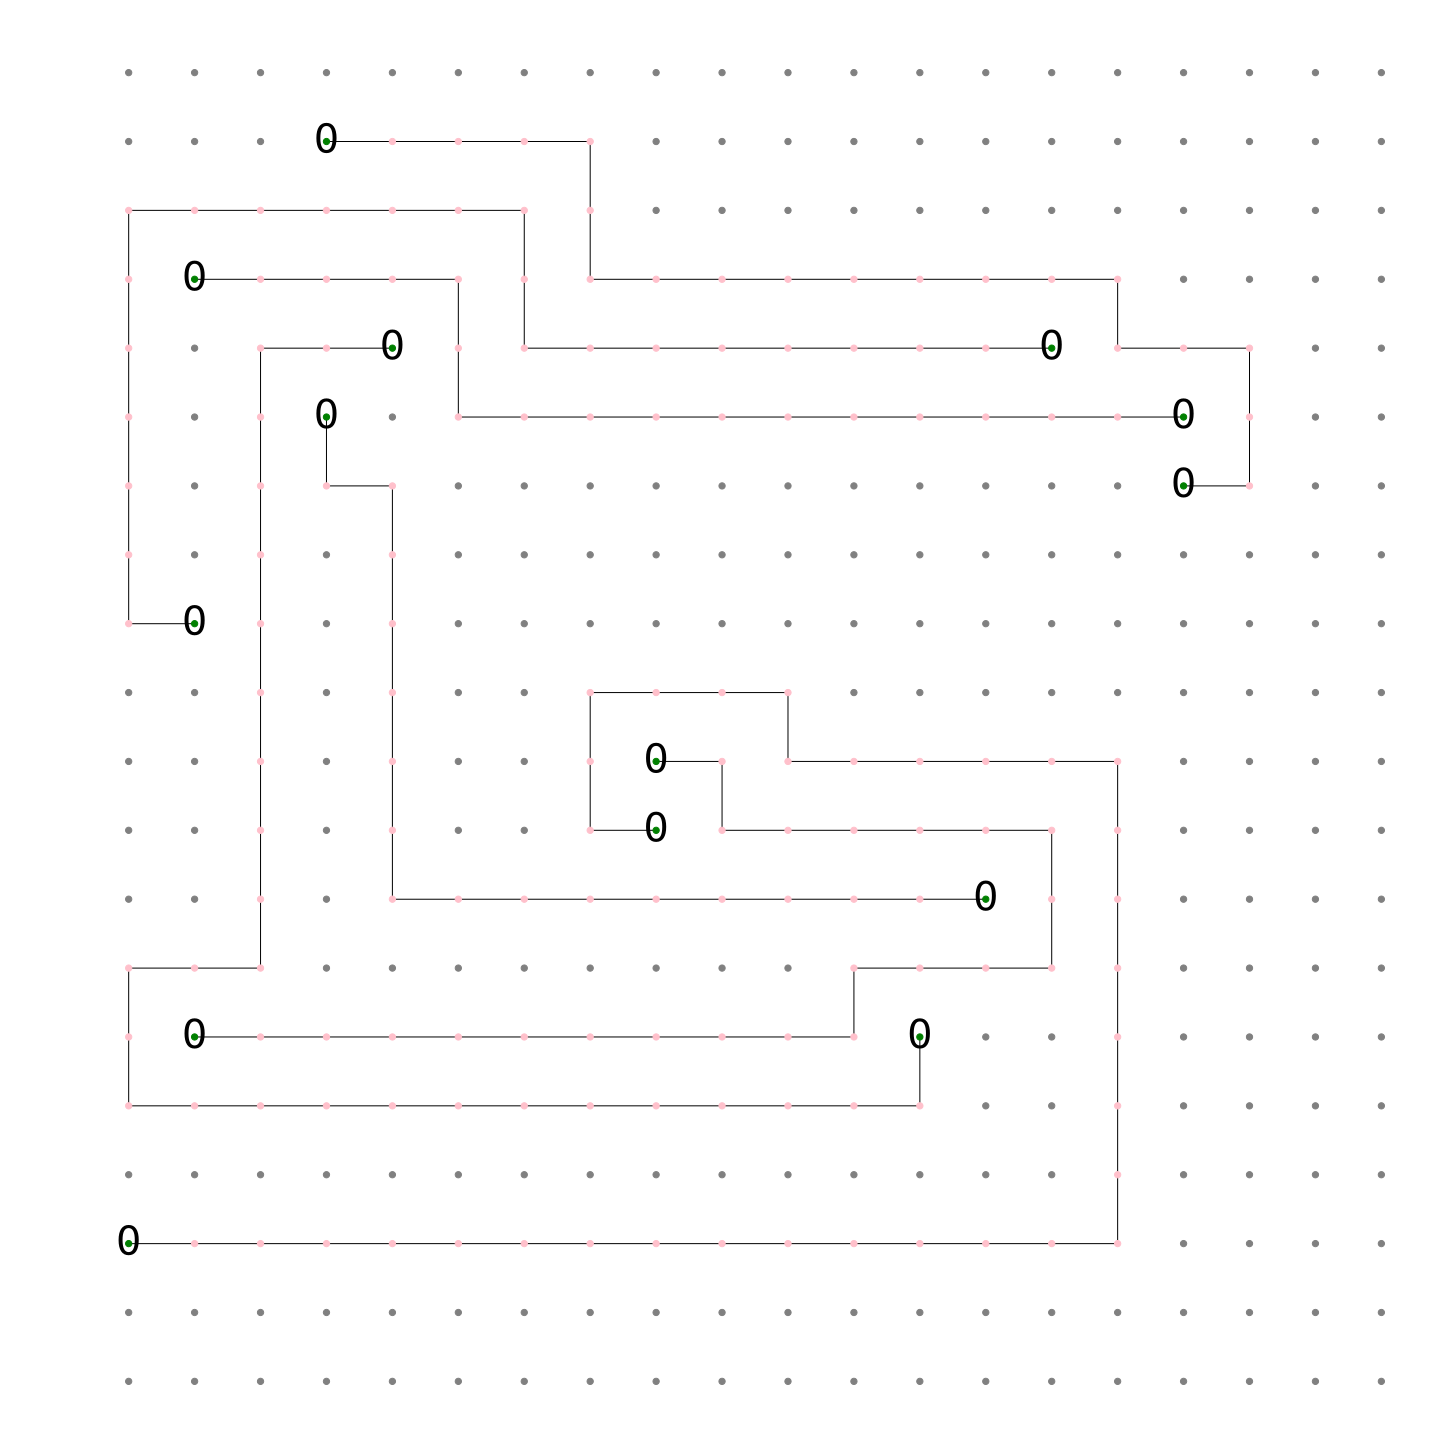

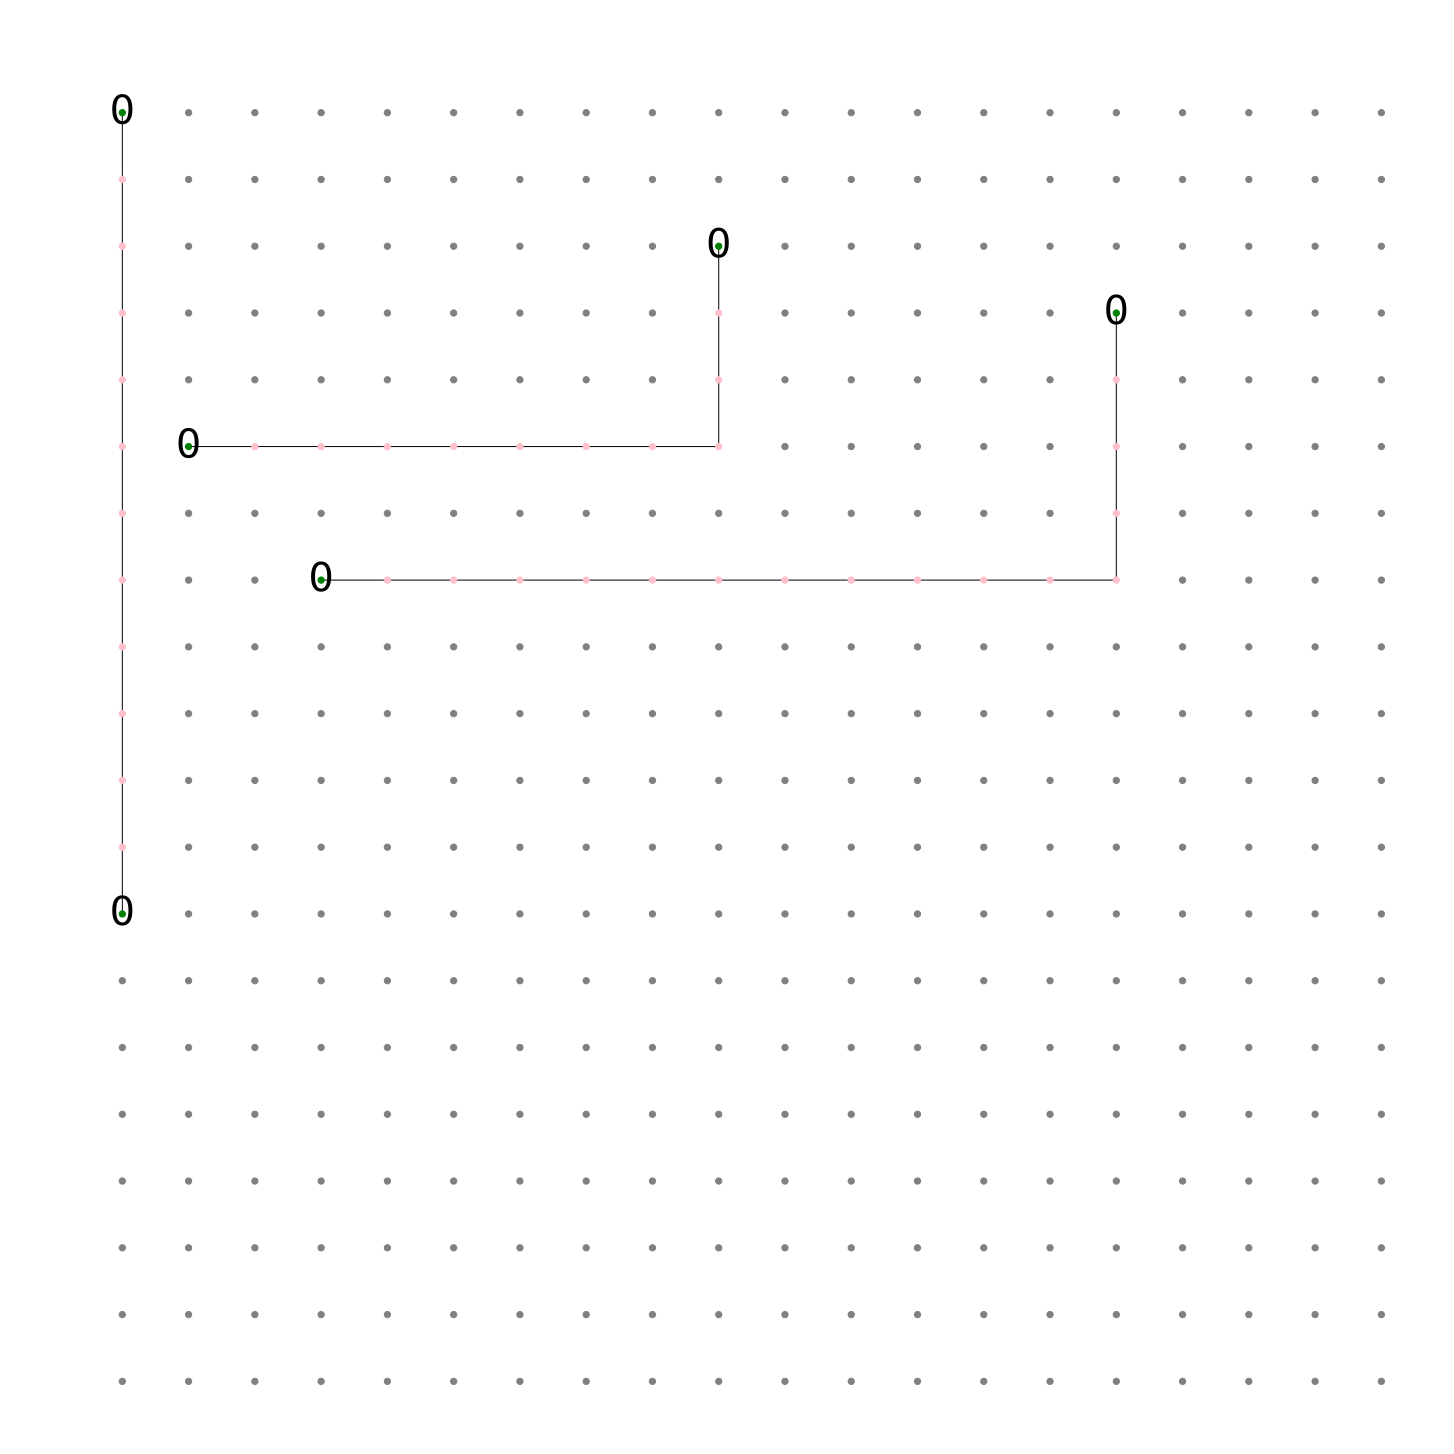

In [2]:
from Schedule import *
from Fusion import *
from Graph_State import *
from Compact_Graph import *
from Validate import *
from Construct_Test_Circuit import *
from Add_Round import *
from Determine_Dependency import *

NQubit = 16
Depth = 400
MaxDegree = 3

def to_undirected(gs):
    undirected_graph = nx.Graph()
    for nnode in gs.nodes():
        undirected_graph.add_node(nnode)
        undirected_graph.nodes[nnode]['layer'] = gs.nodes[nnode]['layer']
    for edge in gs.edges():
        if edge not in undirected_graph.edges():
            undirected_graph.add_edge(edge[0], edge[1])
    return undirected_graph

def main():
    # gates_list, qubits = generate_circuit(NQubit, Depth)
    gates_list, qubits = construct_qaoa(NQubit, 0.5)
    gs, colors = generate_graph_state(gates_list, qubits)
    # for gnode in gs.nodes():
    #     gs.nodes[gnode]['layer'] = 0
    dgraph = determine_dependency(gs)
    gs = schedule(gs, dgraph)
    # gs = partition(gs, input_nodes)
    undirected_graph = to_undirected(gs)
    # pos = nx.spring_layout(dgraph)
    # labels = {node: gs.nodes[node]['layer'] for node in gs.nodes()}
    # nx.draw(dgraph, pos = pos, node_size = 30, labels = labels)
    fgraph, added_nodes = fusion_graph(undirected_graph, MaxDegree)
    fgraph = add_round(fgraph, 1)
    net_list = compact_graph(fgraph)
    fusions = 0
    for net in net_list:
        fusions += len(list(net.edges()))
    print("fusion:", fusions)
    fgraph = validate(net_list, fgraph)   
    return

if __name__ == '__main__':
    main()